In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
raw_data = pd.read_csv("Tractores_Matriculados.csv")
print(raw_data.head(), "\n")  # check data structure
print(raw_data.dtypes)  # check data types

        Fecha  Tractores
0  1986-01-31     1965.0
1  1986-02-28     1467.0
2  1986-03-31     1106.0
3  1986-04-30     1460.0
4  1986-05-31     1563.0 

Fecha         object
Tractores    float64
dtype: object


Fecha        datetime64[ns]
Tractores           float64
dtype: object


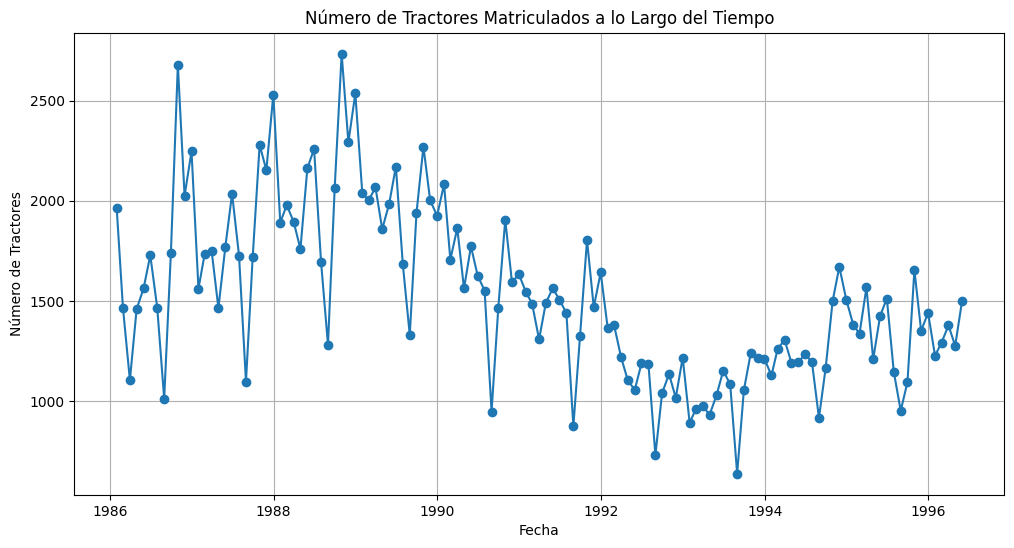

In [6]:
raw_data["Fecha"] = pd.to_datetime(
    raw_data["Fecha"], yearfirst=True
)  # convert to datetime object taking into account the year is first

print(raw_data.dtypes)  # check data types

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(raw_data["Fecha"], raw_data["Tractores"], marker="o")
plt.title("Número de Tractores Matriculados a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de Tractores")
plt.grid(True)
plt.show()

### Statistics

In [7]:
print(raw_data.describe(), "\n")  # summary statistics
print(raw_data.isna())  # check for missing values

"""
we can use raw_data.Fecha.descibe() to get a summary of the date column
"""

""" 
we can see in a specific column if there are missing values with: 
raw_data['column_name'].isna().sum()
"""

                               Fecha    Tractores
count                            132   125.000000
mean   1991-07-16 06:10:54.545454592  1531.120000
min              1986-01-31 00:00:00   639.000000
25%              1988-10-23 06:00:00  1210.000000
50%              1991-07-15 12:00:00  1487.000000
75%              1994-04-07 12:00:00  1773.000000
max              1996-12-31 00:00:00  2734.000000
std                              NaN   425.232889 

     Fecha  Tractores
0    False      False
1    False      False
2    False      False
3    False      False
4    False      False
..     ...        ...
127  False       True
128  False       True
129  False       True
130  False       True
131  False       True

[132 rows x 2 columns]


" \nwe can see in a specific column if there are missing values with: \nraw_data['column_name'].isna().sum()\n"

In [8]:
# Filter data between 1988 to 1994
data = raw_data[
    (raw_data.Fecha >= "1986-01-31 00:00:00")
    & (raw_data.Fecha <= "1995-12-31 00:00:00")
]

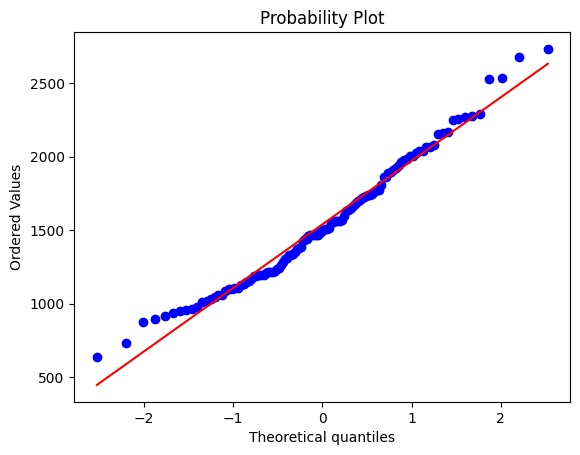

In [10]:
import scipy.stats as stats
import pylab

# Check for normality
stats.probplot(data.Tractores, dist="norm", plot=pylab)
pylab.show()

In [11]:
data.head()

,Fecha,Tractores
0,1986-01-31,1965.0
1,1986-02-28,1467.0
2,1986-03-31,1106.0
3,1986-04-30,1460.0
4,1986-05-31,1563.0


In [12]:
# Set date as index column and sort by date
data.set_index("Fecha", inplace=True)
data.head()

,Tractores
Fecha,
1986-01-31,1965.0
1986-02-28,1467.0
1986-03-31,1106.0
1986-04-30,1460.0
1986-05-31,1563.0


In [10]:
# data = data.asfreq("m")  # set frequency to monthly data
# data.head(50)

""" No funciona, no se puede convertir a frecuencia mensual -- da error"""